In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
import os
from PIL import Image
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [12]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15,15))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [32]:
data_dir = r'D:\hccho\CommonDataset\hymenoptera_data\small'


data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset =  datasets.ImageFolder(data_dir, data_transforms)
class_names = train_dataset.classes
print(class_names)


dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=5,shuffle=True)

['ants', 'bees']


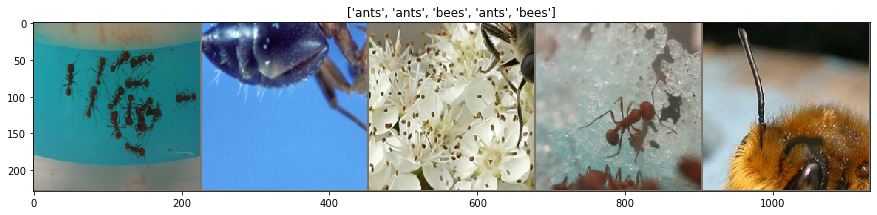

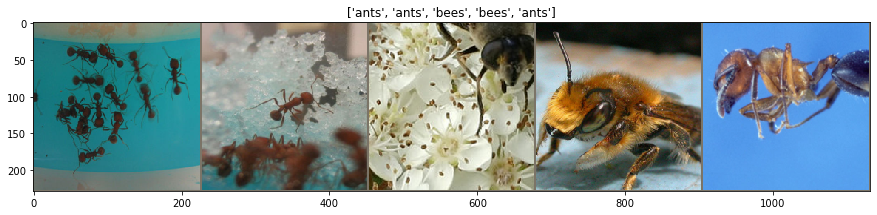

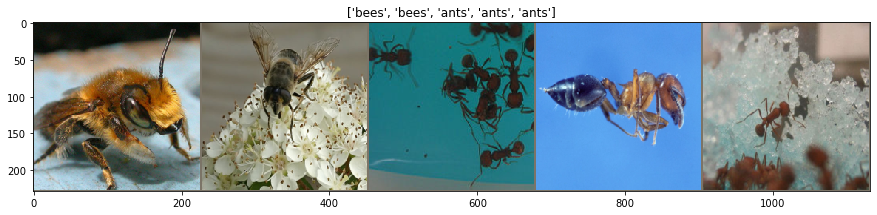

In [33]:
for i in range(3):
    inputs, classes = next(iter(dataloader))

    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

In [29]:
len(dataloader)

3

## torchvision transform

In [1]:
import torchvision.transforms as transforms
from PIL import Image
import numpy as np


transform1 =transforms.RandomResizedCrop(18)
transform2 = transforms.ToTensor()  # 1. Image 또는 ndarray를 tensor로 변환. 2. HWC 또는 HW를 CHW로 만든다. 3. 정수값을 0~1 사이값으로 변환한다.
transform3 = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
img = np.random.randint(0,256,size=(36,36,3)).astype(np.uint8)


a = Image.fromarray(img)  # a.size, a.height, a.width, a.mode  channel은 직접 확인 안된다.



out1 = transform1(a) # PIL.Image.Image in PIL.Image.Image out 


out2 = transform2(out1)  # PIL.Image.Image in torch tensor out. unit8 (HWC 또는 HW) --> CHW(0~1)
out3 = transform3(out2)  # (x-m)/s

print(out2.mean(axis=(1,2)))
print(out3.mean(axis=(1,2)))

print((out2.mean(axis=(1,2))- torch.tensor([0.485, 0.456, 0.406]))/torch.tensor([0.229, 0.224, 0.225]))

transform4 = transforms.Grayscale(num_output_channels=1)

tensor([0.5205, 0.4980, 0.5176])
tensor([0.1549, 0.1876, 0.4958])


NameError: name 'torch' is not defined